In [1]:
import pandas as pd
import numpy as np
import matplotlib as plt
import scipy as sp

In [2]:
# The code for importing the dataset was removed by Watson Studio for sharing.

/opt/conda/envs/Python36/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3020: DtypeWarning: Columns (33) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,SEVERITYCODE,X,Y,OBJECTID,INCKEY,COLDETKEY,REPORTNO,STATUS,ADDRTYPE,INTKEY,...,ROADCOND,LIGHTCOND,PEDROWNOTGRNT,SDOTCOLNUM,SPEEDING,ST_COLCODE,ST_COLDESC,SEGLANEKEY,CROSSWALKKEY,HITPARKEDCAR
0,2,-122.323148,47.703140,1,1307,1307,3502005,Matched,Intersection,37475.0,...,Wet,Daylight,NaN,NaN,NaN,10,Entering at angle,0,0,N
1,1,-122.347294,47.647172,2,52200,52200,2607959,Matched,Block,NaN,...,Wet,Dark - Street Lights On,NaN,6354039.0,NaN,11,From same direction - both going straight - bo...,0,0,N
2,1,-122.334540,47.607871,3,26700,26700,1482393,Matched,Block,NaN,...,Dry,Daylight,NaN,4323031.0,NaN,32,One parked--one moving,0,0,N
3,1,-122.334803,47.604803,4,1144,1144,3503937,Matched,Block,NaN,...,Dry,Daylight,NaN,NaN,NaN,23,From same direction - all others,0,0,N
4,2,-122.306426,47.545739,5,17700,17700,1807429,Matched,Intersection,34387.0,...,Wet,Daylight,NaN,4028032.0,NaN,10,Entering at angle,0,0,N


In [3]:
#showing columns of data
df_data_1.columns

Index(['SEVERITYCODE', 'X', 'Y', 'OBJECTID', 'INCKEY', 'COLDETKEY', 'REPORTNO',
       'STATUS', 'ADDRTYPE', 'INTKEY', 'LOCATION', 'EXCEPTRSNCODE',
       'EXCEPTRSNDESC', 'SEVERITYCODE.1', 'SEVERITYDESC', 'COLLISIONTYPE',
       'PERSONCOUNT', 'PEDCOUNT', 'PEDCYLCOUNT', 'VEHCOUNT', 'INCDATE',
       'INCDTTM', 'JUNCTIONTYPE', 'SDOT_COLCODE', 'SDOT_COLDESC',
       'INATTENTIONIND', 'UNDERINFL', 'WEATHER', 'ROADCOND', 'LIGHTCOND',
       'PEDROWNOTGRNT', 'SDOTCOLNUM', 'SPEEDING', 'ST_COLCODE', 'ST_COLDESC',
       'SEGLANEKEY', 'CROSSWALKKEY', 'HITPARKEDCAR'],
      dtype='object')

In [4]:
#Determining what type of data is in the spread sheet.
df_data_1.dtypes  

SEVERITYCODE        int64
X                 float64
Y                 float64
OBJECTID            int64
INCKEY              int64
COLDETKEY           int64
REPORTNO           object
STATUS             object
ADDRTYPE           object
INTKEY            float64
LOCATION           object
EXCEPTRSNCODE      object
EXCEPTRSNDESC      object
SEVERITYCODE.1      int64
SEVERITYDESC       object
COLLISIONTYPE      object
PERSONCOUNT         int64
PEDCOUNT            int64
PEDCYLCOUNT         int64
VEHCOUNT            int64
INCDATE            object
INCDTTM            object
JUNCTIONTYPE       object
SDOT_COLCODE        int64
SDOT_COLDESC       object
INATTENTIONIND     object
UNDERINFL          object
WEATHER            object
ROADCOND           object
LIGHTCOND          object
PEDROWNOTGRNT      object
SDOTCOLNUM        float64
SPEEDING           object
ST_COLCODE         object
ST_COLDESC         object
SEGLANEKEY          int64
CROSSWALKKEY        int64
HITPARKEDCAR       object
dtype: objec

In [5]:
#renaming to not have to keep typing out
df=df_data_1

In [6]:
#creating a df with speeding and severity code to see if speeding is more likely to cause an accident
df_comparison1=df.filter(['SEVERITYCODE', 'SPEEDING',], axis=1)

In [7]:
df_comparison1

,SEVERITYCODE,SPEEDING
0,2,NaN
1,1,NaN
2,1,NaN
3,1,NaN
4,2,NaN
5,1,NaN
6,1,NaN
7,2,NaN
8,1,NaN
9,2,NaN


In [8]:
df1 = df_comparison1

In [9]:
df1.columns

Index(['SEVERITYCODE', 'SPEEDING'], dtype='object')

In [10]:
df1['SEVERITYCODE'].value_counts().to_frame()

,SEVERITYCODE
1,136485
2,58188


In [11]:
#cannot use speeding for comparison, lacks the data necessary to make any conclusions
##making new hypothesis... determine whether dark/unlit conditions have an impact on accidents

In [12]:
df2=df_data_1

In [13]:
df2['LIGHTCOND'].value_counts().to_frame()

,LIGHTCOND
Daylight,116137
Dark - Street Lights On,48507
Unknown,13473
Dusk,5902
Dawn,2502
Dark - No Street Lights,1537
Dark - Street Lights Off,1199
Other,235
Dark - Unknown Lighting,11


In [14]:
df2=df2.filter(['SEVERITYCODE', 'LIGHTCOND'], axis=1)
df2

,SEVERITYCODE,LIGHTCOND
0,2,Daylight
1,1,Dark - Street Lights On
2,1,Daylight
3,1,Daylight
4,2,Daylight
5,1,Daylight
6,1,Daylight
7,2,Daylight
8,1,Daylight
9,2,Daylight


In [15]:
df2.dtypes

SEVERITYCODE     int64
LIGHTCOND       object
dtype: object

In [16]:
def lightcond(x):
    if x =="Daylight":
        return "Light"
    else:
        return "Dark"


In [17]:
df2['LIGHTCOND'] = df2.LIGHTCOND.apply(lightcond)

In [18]:
df2['LIGHTCOND'].value_counts()

Light    116137
Dark      78536
Name: LIGHTCOND, dtype: int64

In [19]:
#In the dataset there is now light for daylight and dark for all other non lit conditions


In [20]:
def severity(x):
    if x== 1:
        return "Damage"
    else:
        if x== 2:
            return "Injury"
        else:
            return 0

In [21]:
df2['SEVERITYCODE']=df2.SEVERITYCODE.apply(severity)
df2['SEVERITYCODE'].value_counts()

Damage    136485
Injury     58188
Name: SEVERITYCODE, dtype: int64

In [22]:
df2=df2.filter(['SEVERITYCODE', 'LIGHTCOND'], axis=1)
df2

,SEVERITYCODE,LIGHTCOND
0,Injury,Light
1,Damage,Dark
2,Damage,Light
3,Damage,Light
4,Injury,Light
5,Damage,Light
6,Damage,Light
7,Injury,Light
8,Damage,Light
9,Injury,Light


In [26]:
df2['LIGHTCOND'].value_counts()

Light    116137
Dark      78536
Name: LIGHTCOND, dtype: int64

In [25]:
df2['SEVERITYCODE'].value_counts()

Damage    136485
Injury     58188
Name: SEVERITYCODE, dtype: int64

In [27]:
df2.dtypes

SEVERITYCODE    object
LIGHTCOND       object
dtype: object

In [30]:
df2.groupby(['LIGHTCOND', 'SEVERITYCODE']).size().unstack()

SEVERITYCODE,Damage,Injury
LIGHTCOND,,
Dark,58892,19644
Light,77593,38544


In [35]:
df2= df2.groupby(['LIGHTCOND', 'SEVERITYCODE']).size().unstack()

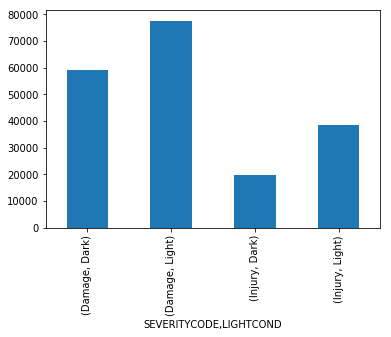

In [36]:
my_plot=df2.unstack().plot(kind='bar', stacked=True)

In [37]:
58892+19644

78536

In [38]:
77593+38544

116137

In [39]:
116137+78536


194673

In [42]:
78536*38544

3027091584

In [43]:
3027091584/116137

26064.83363613663

In [44]:
#total accidents in the light=116137 , injuries in the light=38544
#total injuries in the dark=78536, injuries in the dark=19644

3.0131210435449836

3.013101909506019